# Vorticity Budget closure in MOM6
*Contributors:* [Hemant Khatri](https://github.com/hmkhatri), [Stephen Griffies](https://github.com/StephenGriffies)

Analysis of the vorticity budget offers useful physical insights into ocean fluid mechanics. For example, theories for the large-scale gyre circulation are based on a study of vorticity. Here, we outline an approach to analyze the vorticity budget of the depth-integrated flow. 

## Governing equations

The continuous velocity, $(\mathbf{u}, w) = (u,v, w)$, equation under Boussinesq approximation can be written as

\begin{equation}
 \partial_t \mathbf{u} =  -f \hat{{\bf z}} \wedge \mathbf{u} 
 -\nabla_{s} ( p/\rho_o + \Phi) + (1/\rho_{0}) \, \partial_{z} \boldsymbol{\tau} + \mathbf{a} + \mathbf{b}, \tag{1}
\end{equation}

where we have 
\begin{eqnarray}
 \partial_{z} \boldsymbol{\tau}
  &= & \rho_{0} \, \boldsymbol{F}^{{\text{vert frict}}}
  + \delta(z-\eta) \, \boldsymbol{\tau}_s - \delta(z+H) \, 
  \boldsymbol{\tau}_b \\
\mathbf{a} &= &
 -\zeta \, \hat{{\bf z}} \wedge \mathbf{u} 
 -\nabla_{s} K 
 -w^{(\dot{s})} \, \partial_z \mathbf{u}
 \\
 \mathbf{b} &= &
 \boldsymbol{F}^{{\text{horz frict}}}
 \\
 \zeta &= &\hat{\boldsymbol{z}} 
 \cdot (\nabla_{s} \wedge \boldsymbol{u})
 \\
 \delta(z) &= & \mbox{Dirac delta with dimensions $L^{-1}$}.
\end{eqnarray}

To derive the vorticity budget of the depth-integrated flow, we first vertically integrate the velocity equation (1) from the ocean bottom, $z=-H(x,y)$, to the sea surface, $z=\eta(x,y,t)$), and then take curl of the depth-integrated equation. The final vorticity equation of the depth-integrated flow can be written as

\begin{equation}
   \beta V = 
 \frac{ \nabla \wedge \boldsymbol{\tau}_s}{\rho_{o}} - \frac{ \nabla \wedge \boldsymbol{\tau}_b } 
{\rho_{o}} +
   \frac{J(p_b,H)}{\rho_o} 
+\nabla \wedge \mathcal{A}
+\nabla \wedge\mathcal{B}
-f \, \frac{Q_m}{\rho_o} + f \, \partial_t\eta - \nabla \wedge \mathcal{U}_t. \tag{2}
\end{equation}

Here, $\beta$ is the meridional gradient of the Coriolis parameter $f$, $\tau_s$ is surface wind stress, $\tau_b$ is bottom friction, $p_b$ is pressure at the ocean bottom, $Q_m$ is surface mass flux, and $\rho_o$ is the reference density.  Also, we used the shorthand notation
\begin{equation}
 V = \int_{-H}^{\eta} v \, \mathrm{d}z
 \quad \mbox{and} \quad 
  \mathcal{U}_t =  
  \int_{-H}^{\eta} \partial_t \mathbf{u} \, \mathrm{d}z
  \quad \mbox{and} \quad 
  \mathcal{A} = 
  \int_{-H}^{\eta}\mathbf{a} \, \mathrm{d}z
  \quad \mbox{and} \quad 
  \mathcal{B} = 
  \int_{-H}^{\eta}\mathbf{b} \, \mathrm{d}z,
\end{equation}

As seen in equation (2), several components can modulate the depth-integrated meridional flow. It has been observed that curl of boundary stress terms, $(\nabla \wedge \boldsymbol{\tau}_s - \nabla \wedge \boldsymbol{\tau}_b)/\rho_o$, bottom pressure torque, $J(p_b,H)/\rho_o$, and curl of nonlinear advective terms, $\nabla \wedge \mathcal{A}$, tend to be the dominant terms in the vorticity budget. This approach is found to be helpful in understanding the role of mesoscale eddies and topography in the North Atlantic Ocean [[Hughes and De Cuevas, 2001](https://doi.org/10.1175/1520-0485(2001)031<2871:WWBCIR>2.0.CO;2); [Yeager, 2015](https://doi.org/10.1175/JPO-D-14-0100.1)]. More detals of the derivation and voricity budget analysis can be found in the [document](https://hmkhatri.github.io/MOM6_velocity_vorticity.pdf).

## Diagnosing vorticity budget terms in MOM6

MOM6 is equipped with online diagnostics sufficient for an offline computation of individual terms in the vorticity equation (2).  We do so by making use of the online depth-integrated budget diagnostics and other relevant diagnostics in MOM6 as listed in the table below 

| Process | Term  | Diagnostic Name   | 
| :----------------- | :-----------------: | :----------------- | 
| Depth-sum of thickness-weighted  Coriolis and kinetic energy gradient acceleration| $-\sum_{k}(h_k)\left(\left[ \dfrac{f + \zeta_k}{h_k} \right] \mathbf{\hat{z}} \wedge (h_k \, \mathbf{u}_k)+ \nabla_{s}K_k \right)$ | `intz_CAu_2d`, `intz_CAv_2d` | 
| Depth-sum of thickness-weighted nonlinear Coriolis acceleration| $- \sum_{k} (h_k) \left( \left[ \dfrac{\zeta_k}{h_k} \right] \mathbf{\hat{z}} \wedge (h_k \, \mathbf{u}_k) \right)$ | `intz_rvxv_2d`, `intz_rvxu_2d` | 
| Depth-sum of thickness-weighted kinetic energy gradient acceleration | $- \sum_{k} (h_k) \nabla_{s} K_k$ | `intz_gKEu_2d`, `intz_gKEv_2d` | 
| Depth-sum of thickness-weighted pressure acceleration (baroclinic contribution) | $-\sum_{k} (h_k) \left(\left[ \rho^{-1} \, \nabla_s \, p_k + \nabla_s \Phi_k \right]^{\text{baroclinic}} \right)$ | `intz_PFu_2d`, `intz_PFv_2d` | 
| Depth-sum of thickness-weighted pressure acceleration (barotropic contribution) | $-\sum_{k} (h_k) \left( \left[ \rho^{-1} \, \nabla_s \, p_k + \nabla_s \Phi_k \right]^{\text{barotropic}} \right)$ | `intz_u_BT_accel_2d`, `intz_v_BT_accel_2d` | 
| Depth-sum of thickness-weighted horizontal friction acceleration | $\sum_{k} (h_k) \boldsymbol{F}_k^{{\text{horz frict}}}$ | `intz_diffu_2d`, `intz_diffv_2d` | 
| Surface wind stress | $\tau_s$ | `taux`, `tauy` |
| Bottom friction | $\tau_b$ | `taux_bot`, `tauy_bot` |
| Meridional mass transport | $\rho_o \Delta x\int_{-H}^{\eta} v \, \mathrm{d}z$ | `vmo_2d`|
| Zonal mass transport | $\rho_o \Delta y\int_{-H}^{\eta} u \, \mathrm{d}z$ | `umo_2d`|
| Surface mass flux | $Q_m$ | `wfo` |
| Full column depth | $D$ | `col_height`|

We take the curl of the depth-integrated momentum budget terms offline to obtain the corresponding vorticity budget terms. As the model numerics do not fully manifest the continuum identities, such as Leibniz's rule, it is useful to work directly with the model velocity diagnostic rather than the massaged forms developed in the continuum in equation (2). The offline calculations are shown in the table below.

| Term | Relevant Diagnostic Calculations |
| :----------------- | :----------------- |
|$\beta \int_{-H}^{\eta} v \, \mathrm{d}z$ | $\beta$ $\times$ `vmo_2d` / ($\rho_o\Delta x$), where $\Delta x$ and $\rho_o$ are the zonal grid spacing and reference density |
| $\nabla \wedge {\boldsymbol{\tau}}_s$ | $\partial_x$[ `taux` ] $-$ $\partial_y$[ `tauy` ] |
| $\nabla \wedge {\boldsymbol{\tau}}_b$ | $\partial_x$[ `taux_bot` ] $-$ $\partial_y$[ `tauy_bot` ] |
| $\nabla \wedge \mathcal{A}$ | $\partial_x$[ `intz_rvxv_2d` + `intz_gKEu_2d` ] $-$ $\partial_y$[ `intz_rvxu_2d` + `intz_gKEv_2d` ] + curl of vertical remapping term in the momentum budget |
| $\nabla \wedge \mathcal{B}$ | $\partial_x$[ `intz_diffv_2d` ] $-$ $\partial_y$[ `intz_diffu_2d` ] |
| $\nabla \wedge \mathcal{U}_t$ | $\partial_x$[ `col_height` x `hf_dvdt_2d` ] $-$ $\partial_y$[ `col_height` x `hf_dudt_2d` ] |
| $\partial_t \eta$ | compute using SSH snapshots or use $\partial_t \eta = Q_m/\rho_o - \nabla\cdot\int_{-H}^{\eta}\mathbf{u}\mathrm{d}z =$ `wfo` $/\rho_o - \partial_x$[ `umo_2d` / ($\rho_o\Delta y$) ] $-$ $\partial_y$[ `vmo_2d` / ($\rho_o\Delta x$) ] |

Diagnosis of the bottom pressure torque (BPT) requires some care since the model numerics do not satisfy a discrete version of Leibniz's rule. Following the steps in deriving equation (2), we can write
\begin{equation}
\frac{J(p_b,H)}{\rho_o} 
= - \nabla \wedge 
\left[f \hat{{\bf z}} \wedge {\int_{-H}^{\eta} \mathbf{u} \, \mathrm{d}z} + \frac{1}{\rho_o} {\int_{-H}^{\eta} \nabla p \, \mathrm{d}z}
\right]
+ \beta \int_{-H}^{\eta} {v} \, \mathrm{d}z
+ f \frac{{Q_m}}{\rho_o} 
-f\partial_t{\eta}. \tag{3}
\end{equation}

Thus, we compute bottom pressure torque as the following

$\dfrac{J(p_b,H)}{\rho_o} = \partial_x$[ `intz_CAv\_2d` $-$ `intz_rvxu_2d` $-$ `intz_gKEv_2d` ] $-$ $\partial_y$[ `intz_CAu_2d` $-$ `intz_rvxv_2d` $-$ `intz_gKEu_2d`] 

$+$ $\partial_x$[ `intz_PFv_2d` $+$ `intz_v_BT_accel_2d` ] $-$ $\partial_y$[ `intz_PFu_2d` $+$ `intz_u_BT_accel_2d` ] $+$ $\dfrac{\beta}{\rho_o\Delta x} \times$ `vmo_2d` $+$ $\dfrac{f}{\rho_o} \times$ `wfo` $-$ $f\partial_t\eta$

This approach was found to be most suitable  because the terms on the RHS in the first three lines in equation (2) can be unrealistically large. In general, we expect a significant cancellation between the zonal and meridional gradients when we compute the curl of planetary vorticity advection term, and we expect to obtain $\beta \times V$ . A similar situation is expected in the curl of depth-integrated pressure gradient term. However, this expectation does not seem to follow in individual curl operations in equation (3), but the cancellation happens when we take the sum of the curls of Coriolis advection and pressure gradient terms. This behavior could be related to the numerical handling of the momentum terms in MOM6 and it requires further analysis.

## Vorticity budget terms in a global simuation

Here, we use data (50-year average of the budget terms) from a $1/4^{\circ}$ global ocean MOM6 simulation to analyze the vorticity budget terms. 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from xgcm import Grid
import requests
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import glob, os

from dask.distributed import Client
from dask.distributed import LocalCluster
cluster = LocalCluster()
client = Client(cluster)

Matplotlib is building the font cache; this may take a moment.


In [26]:
# Functions for plotting

def plot_map(ax, da, vmin=-999, vmax=999, lat_lon_ext = [-180, 180, -85., 85.],
             lon='geolon', lat='geolat', cmap='RdBu_r', title='what is it?'):
    
    p = da.plot(ax=ax, x=lon, y=lat, vmin=vmin, vmax=vmax, cmap=cmap, 
                transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False)
    
    # add separate colorbar
    cb = plt.colorbar(p, ax=ax, format='%.1e', extend='both', shrink=0.6)
    cb.ax.tick_params(labelsize=12)

    p.axes.gridlines(color='black', alpha=0.5, linestyle='--')
    
    ax.set_extent(lat_lon_ext, crs=ccrs.PlateCarree())
    
    _ = plt.title(title, fontsize=14)
    return fig

In [3]:
url = 'https://ndownloader.figshare.com/files/28812642'
file1 = requests.get(url)
with open('data.nc', 'wb') as fp:
    fp.write(file1.content)

ds = xr.open_dataset("data.nc")

print(ds)

<xarray.Dataset>
Dimensions:             (nv: 2, xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * xq                  (xq) float64 -299.6 -299.3 -299.1 ... 59.66 59.91 60.16
  * yh                  (yh) float64 -80.39 -80.31 -80.23 ... 89.73 89.84 89.95
  * nv                  (nv) float64 1.0 2.0
  * xh                  (xh) float64 -299.7 -299.5 -299.2 ... 59.53 59.78 60.03
  * yq                  (yq) float64 -80.35 -80.27 -80.19 ... 89.78 89.89 90.0
Data variables:
    hf_dudt_2d          (yh, xq) float64 ...
    hf_dvdt_2d          (yq, xh) float64 ...
    ubt_dt              (yh, xq) float64 ...
    vbt_dt              (yq, xh) float64 ...
    hf_PFu_2d           (yh, xq) float64 ...
    hf_PFv_2d           (yq, xh) float64 ...
    hf_CAu_2d           (yh, xq) float64 ...
    hf_CAv_2d           (yq, xh) float64 ...
    hf_diffu_2d         (yh, xq) float64 ...
    hf_diffv_2d         (yq, xh) float64 ...
    hf_du_dt_visc_2d    (yh, xq) float64 ...
    hf_dv_dt_visc_2d   

In [4]:
# Create grid and interpolate depth, beta

OMEGA = 7.2921e-5
RAD_EARTH = 6.378e6

grid = Grid(ds, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'} }, periodic=['X'])

colh_u = grid.interp(ds['col_height'] * ds['areacello'], 'X',  boundary='fill') / ds['areacello_cu']
colh_v = grid.interp(ds['col_height'] * ds['areacello'], 'Y',  boundary='fill') / ds['areacello_cv']

beta_v = 2*OMEGA*np.cos(ds.geolat_v * np.pi /180.)/RAD_EARTH
beta_q = 2*OMEGA*np.cos(ds.geolat_c * np.pi /180.)/RAD_EARTH

In [35]:
# Take curl of depth-integrated momentum budget terms to ontain vorticity budget terms

rho_0 = 1035.

Budget_vort = xr.Dataset()

# compute beta x V term
V_beta = (ds['vmo_2d'] / (rho_0 * ds['dxCv']))
V_beta = beta_q * grid.interp(V_beta, 'X',  boundary='fill')
Budget_vort['V_beta'] = V_beta

# compute curl of boundary stresses
Curl_taus = ( - grid.diff(ds['taux'] * ds.dxCu, 'Y', boundary='fill')
             + grid.diff(ds['tauy'] * ds.dyCv, 'X', boundary='fill') )/ ds.areacello_bu
Budget_vort['Curl_taus'] = Curl_taus / (rho_0 )

Curl_taub = ( - grid.diff(ds['taux_bot'] * ds.dxCu, 'Y', boundary='fill')
                   + grid.diff(ds['tauy_bot'] * ds.dyCv, 'X', boundary='fill') )/ ds.areacello_bu
Budget_vort['Curl_taub'] = Curl_taub / (rho_0 )

# compute curl of nonlinear advective and horizontal diffusion terms
Curl_Hrv = ( - grid.diff((ds['intz_rvxv_2d'] + ds['intz_gKEu_2d']) * ds.dxCu, 'Y', boundary='fill')
           + grid.diff((ds['intz_rvxu_2d'] + ds['intz_gKEv_2d']) * ds.dyCv, 'X', boundary='fill') )/ ds.areacello_bu
Budget_vort['Curl_Adv'] = Curl_Hrv

Curl_Hdiff2 = ( - grid.diff(ds['intz_diffu_2d'] * ds.dxCu, 'Y', boundary='fill')
             + grid.diff(ds['intz_diffv_2d'] * ds.dyCv, 'X', boundary='fill') )/ ds.areacello_bu
Budget_vort['Curl_Hdiff'] = Curl_Hdiff2

# Time tendency and surface mass flux terms
Mass_Surf = (grid.interp(grid.interp(ds['wfo'] * ds['areacello'], 'X', boundary='fill'), 'Y',  boundary='fill') 
             * ds['Coriolis'] / (rho_0)) / ds['areacello_bu']
Budget_vort['f_Qm'] = Mass_Surf

Curl_dudt = ( - grid.diff( ds['hf_dudt_2d'] * colh_u * ds['dxCu'], 'Y', boundary='fill')
            + grid.diff( ds['hf_dvdt_2d'] * colh_v * ds['dyCv'], 'X', boundary='fill') ) / ds.areacello_bu
Budget_vort['Curl_dudt'] = Curl_dudt

div_u = (grid.diff(ds['umo_2d'] / (rho_0), 'X', boundary='fill') + 
         grid.diff(ds['vmo_2d'] / (rho_0), 'Y', boundary='fill') ) / ds['areacello']
f_div_u = (grid.interp(grid.interp(div_u * ds['areacello'], 'X', boundary='fill'), 'Y', boundary='fill')
        * ds['Coriolis']) / ds['areacello_bu']
Budget_vort['fdhdt'] = (Mass_Surf - f_div_u)

# Curl of remapping term and add it to Curl_Adv term
tmpx = (ds['hf_dudt_2d'] * colh_u - ds['intz_CAu_2d']-ds['intz_PFu_2d']-ds['intz_diffu_2d']-
       ds['intz_u_BT_accel_2d'] - ds['taux']/rho_0 + ds['taux_bot']/rho_0)
tmpy = (ds['hf_dvdt_2d'] * colh_v - ds['intz_CAv_2d']-ds['intz_PFv_2d']-ds['intz_diffv_2d']-
       ds['intz_v_BT_accel_2d'] - ds['tauy'] /rho_0 + ds['tauy_bot']/rho_0)
Curl_remap = ( - grid.diff(tmpx * ds.dxCu, 'Y', boundary='fill')
             + grid.diff(tmpy * ds.dyCv, 'X', boundary='fill') )/ ds.areacello_bu
Budget_vort['Curl_remap'] = Curl_remap
Budget_vort['Curl_Adv'] = (Budget_vort['Curl_Adv'] + Budget_vort['Curl_remap'])

# Computing bottom pressure torque torque
Curl_dp = (( - grid.diff((ds['intz_PFu_2d'] + ds['intz_u_BT_accel_2d']) * ds.dxCu, 'Y', boundary='fill')
           + grid.diff((ds['intz_PFv_2d'] + ds['intz_v_BT_accel_2d']) * ds.dyCv, 'X', boundary='fill')) / ds.areacello_bu)
Budget_vort['Curl_dp'] = Curl_dp

Curl_Cor = ( - grid.diff((ds['intz_CAu_2d'] - ds['intz_gKEu_2d'] - ds['intz_rvxv_2d'])* ds.dxCu, 'Y', boundary='fill')
           + grid.diff((ds['intz_CAv_2d'] - ds['intz_gKEv_2d'] - ds['intz_rvxu_2d'])* ds.dyCv, 'X', boundary='fill'))/ ds.areacello_bu
Budget_vort['Curl_Cor'] = Curl_Cor

Budget_vort['BPT'] = (Budget_vort['Curl_dp'] + Budget_vort['Curl_Cor'] + Budget_vort['V_beta'] 
                      + Budget_vort['f_Qm'] - Budget_vort['fdhdt'])

# incorporate -ve signs in terms (see equation (2))
Budget_vort['Curl_dudt'] = - Budget_vort['Curl_dudt']
Budget_vort['f_Qm'] = - Budget_vort['f_Qm']
Budget_vort['Curl_taub'] = - Budget_vort['Curl_taub']

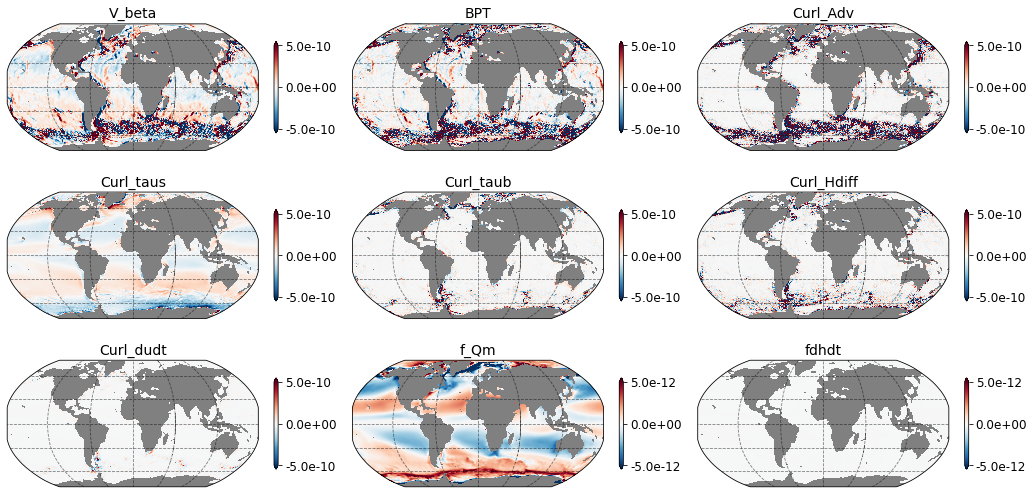

In [41]:
# Plot budget terms (applied to rolling window over 10 grid points remove small-scale noise)

grid1 = plt.GridSpec(3, 3, wspace=0.1, hspace=0.1)
fig = plt.figure(figsize=[18,9])

lat_lon_ext = [-180, 180, -85., 85.]

fld_list = ['V_beta', 'BPT',  'Curl_Adv', 'Curl_taus', 'Curl_taub', 'Curl_Hdiff', 'Curl_dudt', 'f_Qm', 'fdhdt']


Budget_vort = Budget_vort.assign_coords({'geolon_c': ds['geolon_c'], 'geolat_c': ds['geolat_c']})

i = 0
for var in fld_list:
    
    if(i<7):
        max_r = 5.e-10
    else:
        max_r = 5.e-12
        
    tmp = Budget_vort[var].rolling(xq = 10, center=True).mean().rolling(yq = 10, center=True).mean()
    
    ax = fig.add_subplot(grid1[int(i / 3), int(i % 3)], projection=ccrs.Robinson(),facecolor='grey')
    _ = plot_map(ax, tmp, vmin=-max_r, vmax=max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=var)

    i = i + 1

As seen in the figure above, mainly bottom pressure torque and nonlinear advective terms modulate the depth-integrated meridional flow, especially near the continental boundaries and in mid-latitudes. Indeed, significant regional variability is present. 

Moreover, in the figure below, we compare the curl of depth-integrated pressure gradient term and planetary vorticity advection term. The cancellation between zonal and meridional gradients is not perfect in the individual curl operations and large amplitudes are visible near continetal boundaries. These large amplitudes are not realistic and are due to model numerics. However, large amplitudes disappear when we add the the two fields. This is why we used equation (3) to compute bottom pressure torque term.  

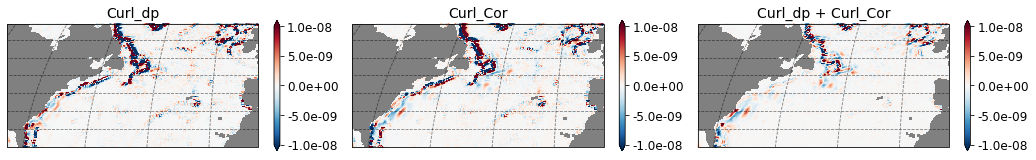

In [49]:
# Compare Curl of depth-integrated pressure gradient and Coriolis advection terms

grid1 = plt.GridSpec(1, 3, wspace=0.1, hspace=0.1)
fig = plt.figure(figsize=[18,4])

lat_lon_ext = [-85., -5., 25., 60.]
max_r = 1.e-8

fld_list = ['Curl_dp', 'Curl_Cor', 'Curl_dp + Curl_Cor']

i = 0
for var in fld_list:
    
    if(var == 'Curl_dp + Curl_Cor'):
        tmp = (Budget_vort['Curl_dp'] + Budget_vort['Curl_Cor']).rolling(xq = 4, center=True).mean().rolling(yq = 4, center=True).mean()
    else:
        tmp = Budget_vort[var].rolling(xq = 4, center=True).mean().rolling(yq = 4, center=True).mean()
        
    ax = fig.add_subplot(grid1[0, int(i)], projection=ccrs.Robinson(),facecolor='grey')
    _ = plot_map(ax, tmp, vmin=-max_r, vmax=max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=var)
    
    i = i + 1

In [50]:
ds.close()
client.close()
cluster.close()